## Derive log returns from the raw stock price dataset

In [1]:
import pandas as pd
import math

# Load the dataset
df = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0, parse_dates=True)

# Calculate log returns using the provided formula
log_returns = df.shift(-1) / df - 1
log_returns = log_returns.applymap(lambda x: math.log(1 + x) if pd.notna(x) else 0)

# Display the first few rows of the resulting DataFrame
print(log_returns.head())


                 MMM       ACE       ABT       ANF      ADBE       AMD  \
date                                                                     
2011-01-03 -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806   
2011-01-04  0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837   
2011-01-05 -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001   
2011-01-06  0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982   
2011-01-07  0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961   

                 AES       AET       AFL         A  ...       WYN      WYNN  \
date                                                ...                       
2011-01-03  0.004773  0.005141 -0.018417 -0.009356  ... -0.006214  0.030719   
2011-01-04  0.013402  0.009569 -0.001949 -0.002172  ... -0.003286  0.012819   
2011-01-05  0.017081  0.018557 -0.005514  0.001931  ... -0.014589  0.007264   
2011-01-06  0.000000  0.002179 -0.003931  0.003369  ... -0.003681  0.034794   
2011-01

## Plot a screen plot which shows the distribution of variance contained in subsequent principal components sorted by their eigenvalues

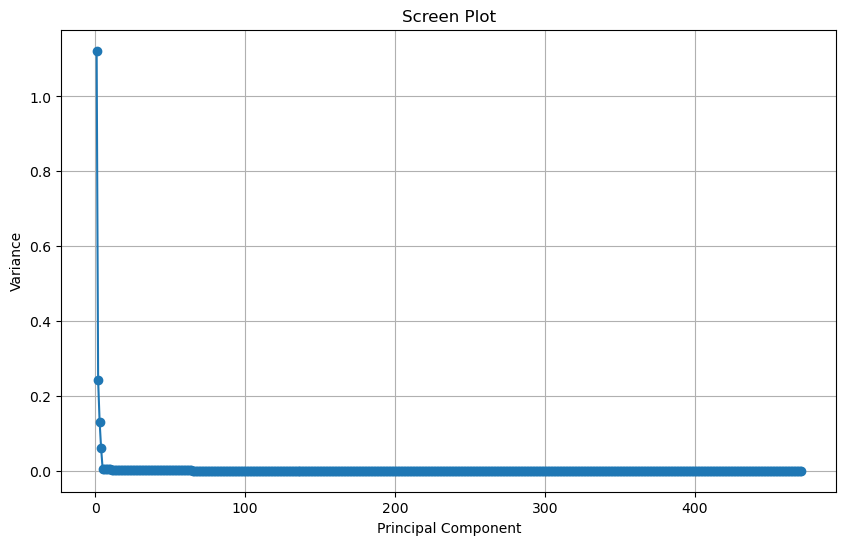

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0, parse_dates=True)

# Calculate log returns using the provided formula
log_returns = df.shift(-1) / df - 1
log_returns = log_returns.applymap(lambda x: np.log(1 + x) if pd.notna(x) else 0)

# Perform PCA
pca = PCA()
pca.fit(log_returns)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.title('Screen Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.grid(True)
plt.show()


## Create a second plot showing cumulative variance retained if top N components are kept after dimensionality reduction

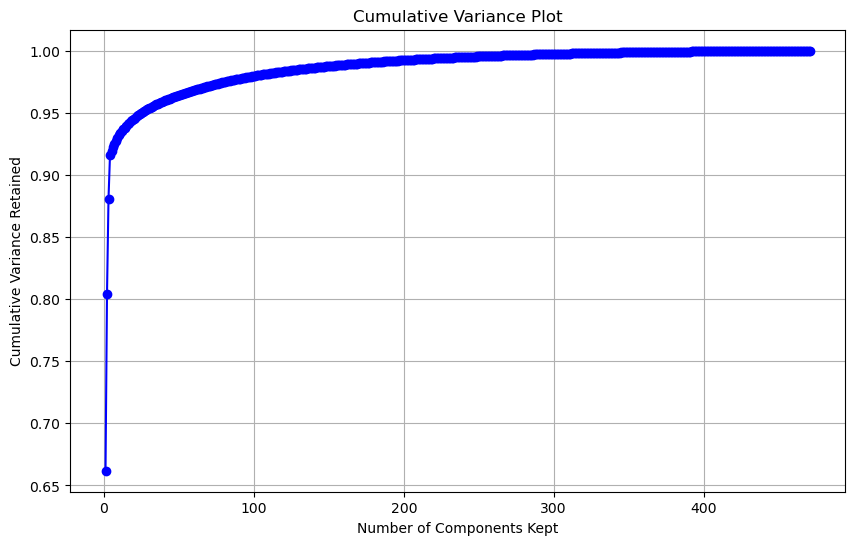

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0, parse_dates=True)

# Calculate log returns using the provided formula
log_returns = df.shift(-1) / df - 1
log_returns = log_returns.applymap(lambda x: np.log(1 + x) if pd.notna(x) else 0)

# Perform PCA
pca = PCA()
pca.fit(log_returns)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Variance Plot')
plt.xlabel('Number of Components Kept')
plt.ylabel('Cumulative Variance Retained')
plt.grid(True)
plt.show()


## Compute and plot the time series of the 1st principal component and observe temporal patterns. Identify the date with the lowest value for this component

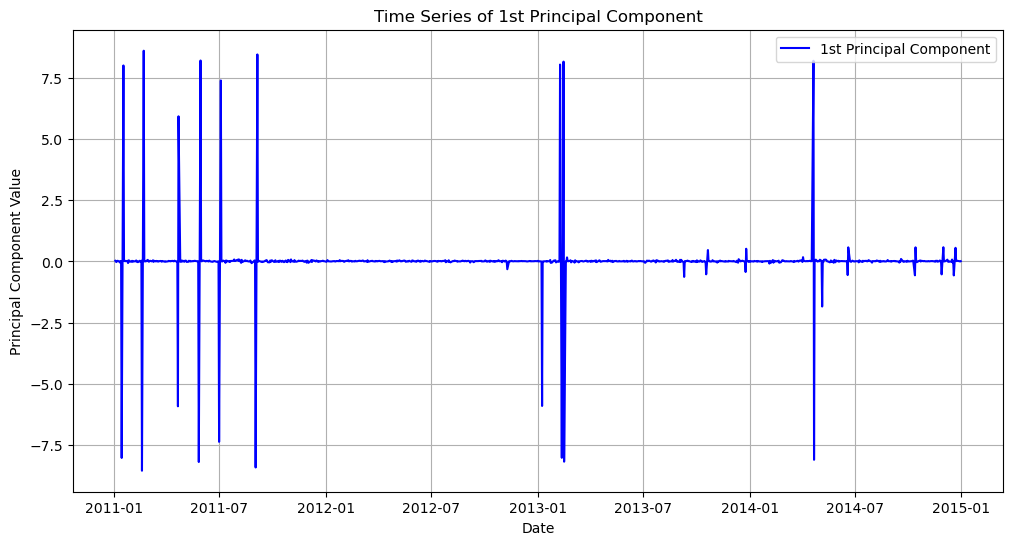

The date with the lowest value for the 1st principal component is: 2011-02-18 00:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0, parse_dates=True)

# Calculate log returns using the provided formula
log_returns = df.shift(-1) / df - 1
log_returns = log_returns.applymap(lambda x: np.log(1 + x) if pd.notna(x) else 0)

# Perform PCA
pca = PCA()
pca.fit(log_returns)

# Get the 1st principal component
first_principal_component = pca.transform(log_returns)[:, 0]

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(log_returns.index, first_principal_component, label='1st Principal Component', color='blue')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.grid(True)
plt.show()

# Find the date with the lowest value for the 1st principal component
min_value_date = log_returns.index[np.argmin(first_principal_component)]
print(f"The date with the lowest value for the 1st principal component is: {min_value_date}")


## Extract the weights from the PCA model for 1st and 2nd principal components

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0, parse_dates=True)

# Calculate log returns using the provided formula
log_returns = df.shift(-1) / df - 1
log_returns = log_returns.applymap(lambda x: np.log(1 + x) if pd.notna(x) else 0)

# Perform PCA
pca = PCA()
pca.fit(log_returns)

# Extract weights for the 1st and 2nd principal components
weights_1st_component = pca.components_[0]
weights_2nd_component = pca.components_[1]

# Display the weights
print("Weights for the 1st Principal Component:")
print(weights_1st_component)

print("\nWeights for the 2nd Principal Component:")
print(weights_2nd_component)


Weights for the 1st Principal Component:
[-2.53436611e-04 -4.24269718e-04  7.10546309e-05 -2.84991720e-04
 -5.72624736e-04  4.83461625e-05 -3.91391431e-04 -4.58441370e-04
 -6.23355851e-04 -9.66790313e-04 -1.90164425e-04 -1.46209116e-04
 -1.15295755e-03 -1.72595973e-04 -4.68930665e-04 -6.97482680e-04
  8.32218752e-04 -2.84776813e-04 -3.45667255e-04  2.36074023e-04
  5.67907546e-06 -6.03868577e-04  1.88063763e-04 -3.60328137e-04
 -8.37719819e-04 -1.43304385e-04 -5.86544367e-04  7.48081054e-05
  4.97403471e-04 -9.91842052e-05 -2.94323489e-04 -6.50174040e-05
 -1.48898160e-04 -7.82697708e-04  3.27130810e-04  1.33951318e-03
  3.81888847e-04 -5.37886685e-04 -1.64867295e-04 -1.07118038e-03
  5.46165765e-05  1.24379597e-04 -1.18801232e-04 -2.47946678e-04
 -2.03057572e-04  2.29706045e-04 -9.27848890e-05 -1.63850787e-03
 -5.88828290e-04 -1.88967766e-04 -7.00904547e-04 -6.55421396e-04
  6.85665727e-05 -1.94996874e-04 -3.93593287e-04 -7.43027263e-05
 -4.63437038e-04 -1.60464289e-04 -2.80161335e-04 

## Create a plot to show weights of the 1st principal component grouped by the industry sector

Sector
consumer                       1.254986e-07
consumer discretionary         1.351345e-02
consumer staples               6.333195e-08
energy                         1.875755e-07
financials                    -2.150593e-06
health care                    1.201430e-05
industrials                    2.098995e-07
information technology         2.116078e-07
materials                     -1.167356e-07
telecommunications services   -8.428948e-07
utilities                     -1.950318e-08
Name: Weight_1st_Component, dtype: float64


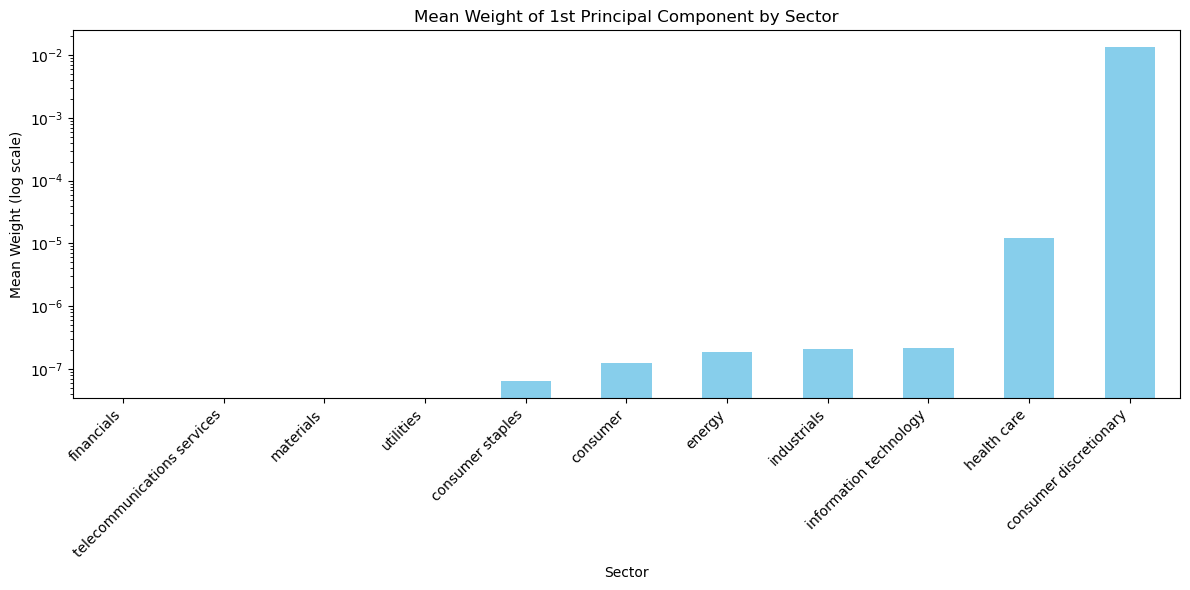

In [66]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the new merged dataset
merged_df = pd.read_csv("new_merged_stock_ticker.csv")

# Step 2: Extract stock prices
stock_prices = merged_df.iloc[:, 3:]

# Step 3: Convert stock prices to numeric values
stock_prices = stock_prices.apply(pd.to_numeric, errors='coerce')

# Step 4: Calculate log returns
log_returns = stock_prices.pct_change().dropna()

# Step 5: Perform PCA with the correct number of components
pca = PCA(n_components=min(len(stock_prices), len(stock_prices.columns)))
pca.fit(log_returns)

# Step 6: Extract weights for the 1st principal component
weights_1st_component = pca.components_[0]

# Step 7: Ensure 'Weight_1st_Component' matches the number of tickers
weights_df = pd.DataFrame({'Ticker': stock_prices.columns, 'Weight_1st_Component': weights_1st_component[:len(stock_prices.columns)]})

# Step 8: Extract sector information from the third row
sector_info = merged_df.iloc[1, :].values

# Step 9: Merge with sector information
merged_with_sector = pd.merge(weights_df, pd.DataFrame({'Ticker': stock_prices.columns, 'Sector': sector_info[:len(stock_prices.columns)]}), on='Ticker')

# Step 10: Remove leading and trailing whitespaces and convert to lowercase for sector names
merged_with_sector['Sector'] = merged_with_sector['Sector'].str.strip().str.lower()

# Step 11: Exclude the row with the label "sector"
merged_with_sector = merged_with_sector[merged_with_sector['Sector'] != 'sector']

# Step 12: Calculate mean weight per sector
mean_weights_by_sector = merged_with_sector.groupby('Sector')['Weight_1st_Component'].mean()

# Handle NaN values
mean_weights_by_sector = mean_weights_by_sector.dropna()

# Display the updated output
print(mean_weights_by_sector)

# Plot bar chart with logarithmic y-axis
plt.figure(figsize=(12, 6))
mean_weights_by_sector.sort_values().plot(kind='bar', color='skyblue')
plt.title('Mean Weight of 1st Principal Component by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Weight (log scale)')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Set logarithmic scale for the y-axis
plt.yscale("log")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Make a similar plot for the 2nd principal component

Sector
consumer                      -0.000004
consumer discretionary         0.000078
consumer staples              -0.000030
energy                        -0.000030
financials                     0.012322
health care                   -0.000061
industrials                   -0.000028
information technology        -0.000026
materials                     -0.000027
telecommunications services   -0.000011
utilities                     -0.000017
Name: Weight_2nd_Component, dtype: float64


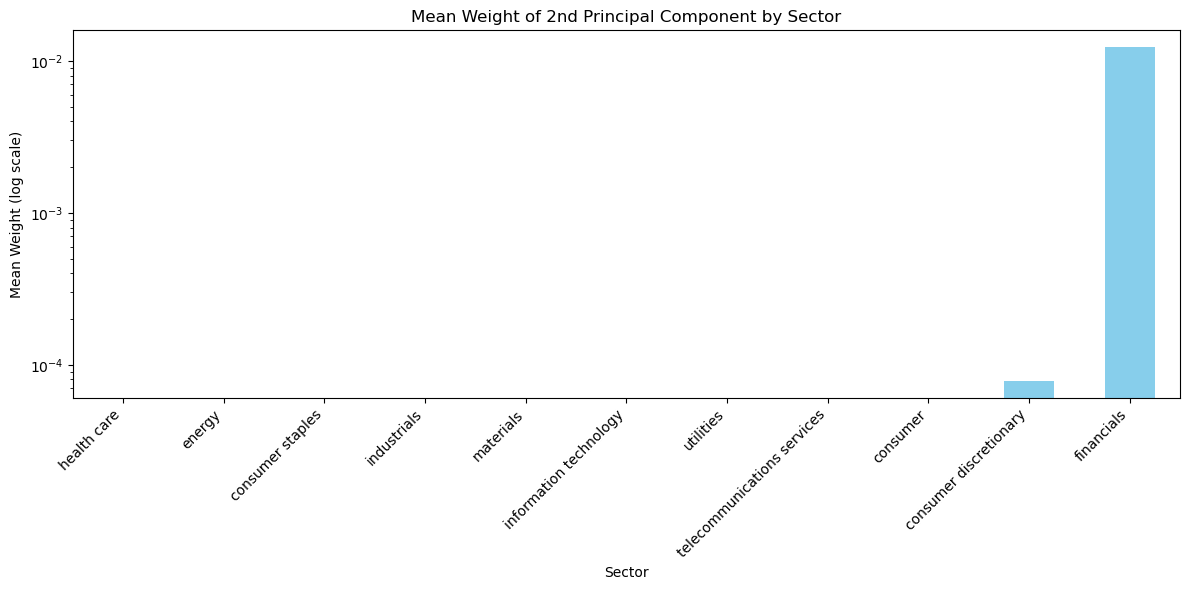

In [67]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the new merged dataset
merged_df = pd.read_csv("new_merged_stock_ticker.csv")

# Step 2: Extract stock prices
stock_prices = merged_df.iloc[:, 3:]

# Step 3: Convert stock prices to numeric values
stock_prices = stock_prices.apply(pd.to_numeric, errors='coerce')

# Step 4: Calculate log returns
log_returns = stock_prices.pct_change().dropna()

# Step 5: Perform PCA with the correct number of components
pca = PCA(n_components=min(len(stock_prices), len(stock_prices.columns)))
pca.fit(log_returns)

# Step 6: Extract weights for the 2nd principal component
weights_2nd_component = pca.components_[1]

# Step 7: Ensure 'Weight_2nd_Component' matches the number of tickers
weights_df_2nd = pd.DataFrame({'Ticker': stock_prices.columns, 'Weight_2nd_Component': weights_2nd_component[:len(stock_prices.columns)]})

# Step 8: Extract sector information from the third row
sector_info_2nd = merged_df.iloc[1, :].values

# Step 9: Merge with sector information
merged_with_sector_2nd = pd.merge(weights_df_2nd, pd.DataFrame({'Ticker': stock_prices.columns, 'Sector': sector_info_2nd[:len(stock_prices.columns)]}), on='Ticker')

# Step 10: Remove leading and trailing whitespaces and convert to lowercase for sector names
merged_with_sector_2nd['Sector'] = merged_with_sector_2nd['Sector'].str.strip().str.lower()

# Step 11: Exclude the row with the label "sector"
merged_with_sector_2nd = merged_with_sector_2nd[merged_with_sector_2nd['Sector'] != 'sector']

# Step 12: Calculate mean weight per sector
mean_weights_by_sector_2nd = merged_with_sector_2nd.groupby('Sector')['Weight_2nd_Component'].mean()

# Handle NaN values
mean_weights_by_sector_2nd = mean_weights_by_sector_2nd.dropna()

# Display the updated output
print(mean_weights_by_sector_2nd)

# Plot bar chart with logarithmic y-axis
plt.figure(figsize=(12, 6))
mean_weights_by_sector_2nd.sort_values().plot(kind='bar', color='skyblue')
plt.title('Mean Weight of 2nd Principal Component by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Weight (log scale)')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Set logarithmic scale for the y-axis
plt.yscale("log")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Backward Stepwise Regression (Feature Selection)

In [68]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('BMI.csv')

# Assuming 'fatpctg' is the target variable and all other columns are features
target_variable = 'fatpctg'
features = df.columns[df.columns != target_variable]

# Function to perform backward stepwise regression
def backward_stepwise_regression(X, y):
    selected_features = list(X.columns)
    while len(selected_features) > 0:
        X_with_const = sm.add_constant(X[selected_features])
        model = sm.OLS(y, X_with_const).fit()
        p_values = model.pvalues[1:]  # Exclude the constant term
        max_p_value = p_values.max()
        if max_p_value > 0.05:  # Adjust the significance level as needed
            excluded_feature = p_values.idxmax()
            selected_features.remove(excluded_feature)
        else:
            break
    return selected_features

# Split the dataset into features (X) and target variable (y)
X = df[features]
y = df[target_variable]

# Perform backward stepwise regression
selected_features = backward_stepwise_regression(X, y)

# Display the selected features
print("Selected Features:", selected_features)


Selected Features: ['Age', 'Neck', 'Abdomen', 'Hip', 'Thigh', 'Forearm', 'Wrist']


## Forward Stepwise Regression (Feature Selection)

In [69]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('BMI.csv')

# Assuming 'fatpctg' is the target variable and all other columns are features
target_variable = 'fatpctg'
features = df.columns[df.columns != target_variable]

# Function to perform forward stepwise regression
def forward_stepwise_regression(X, y):
    selected_features = []
    remaining_features = list(X.columns)
    while len(remaining_features) > 0:
        best_p_value = float('inf')
        best_feature = None
        for feature in remaining_features:
            X_with_const = sm.add_constant(X[selected_features + [feature]])
            model = sm.OLS(y, X_with_const).fit()
            p_value = model.pvalues[feature]
            if p_value < best_p_value:
                best_p_value = p_value
                best_feature = feature
        if best_p_value < 0.05:  # Adjust the significance level as needed
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    return selected_features

# Split the dataset into features (X) and target variable (y)
X = df[features]
y = df[target_variable]

# Perform forward stepwise regression
selected_features = forward_stepwise_regression(X, y)

# Display the selected features
print("Selected Features:", selected_features)


Selected Features: ['Abdomen', 'Weight', 'Wrist', 'Forearm']


## Filter Method (Feature Selection)

In [70]:
import pandas as pd

# Load the dataset
df = pd.read_csv('BMI.csv')

# Assuming 'fatpctg' is the target variable and all other columns are features
target_variable = 'fatpctg'
features = df.columns[df.columns != target_variable]

# Calculate Pearson correlation coefficients between features and target variable
correlations = df[features].corrwith(df[target_variable])

# Rank features based on absolute correlation values
ranked_features = correlations.abs().sort_values(ascending=False)

# Display the ranked features
print("Ranked Features based on Correlation:")
print(ranked_features)


Ranked Features based on Correlation:
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


## Lasso Regression (Feature Selection)

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('BMI.csv')

# Assuming 'fatpctg' is the target variable and all other columns are features
target_variable = 'fatpctg'
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Lasso Regression model
lasso_model = Lasso(alpha=0.01)  # Adjust the alpha parameter as needed

# Fit the model to the training data
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Display the coefficients and selected features
coefficients = pd.Series(lasso_model.coef_, index=X.columns)
selected_features = coefficients[coefficients != 0].index
print("Selected Features:")
print(selected_features)


Mean Squared Error: 19.608147151824987
Selected Features:
Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')


## Random Forest (Feature Selection)

Mean Squared Error: 17.506944176470594
Feature Importances:
Abdomen    0.714957
Weight     0.031164
Wrist      0.030504
Height     0.029040
Hip        0.028463
Neck       0.026902
Chest      0.024049
Age        0.023840
Ankle      0.019951
Biceps     0.019619
Knee       0.019410
Forearm    0.016606
Thigh      0.015493
dtype: float64


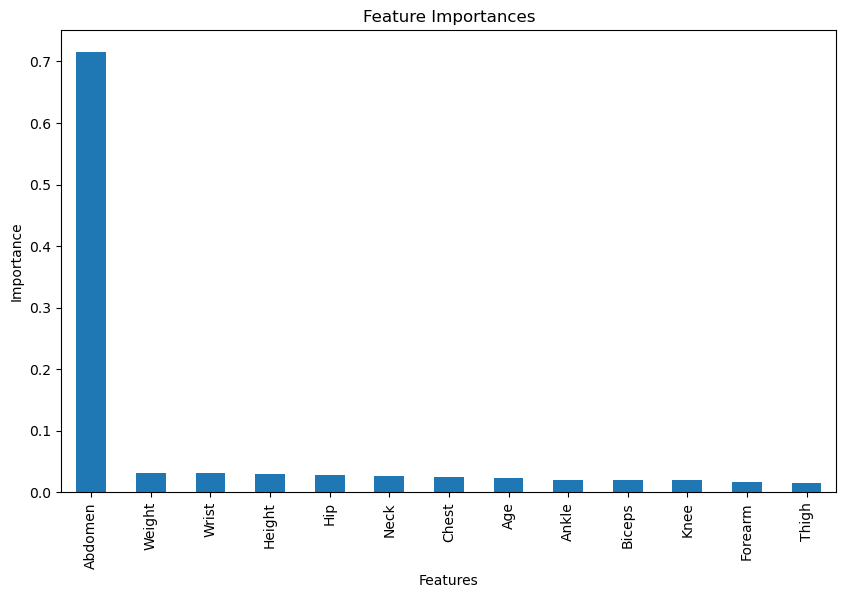

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('BMI.csv')

# Assuming 'fatpctg' is the target variable and all other columns are features
target_variable = 'fatpctg'
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Display feature importances
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
